# La Transformada de Fourier.

Hemos analizado y aplicado la transformada de Laplace al análisis de sistemas dinámicos. La transformada de Laplace permite la algebrización del problema de cálculo que implica el modelado de los sistemas por medio de ecuaciones diferenciales. Por otro lado, la serie trigonométrica de Fourier ofrece una alternativa muy útil de representación de señales en términos de sus componentes frecuenciales o armónicos. Una Herramienta para el análisis de señales y sistemas en el domino de la frecuencia es la transformada de Fourier. La transformada de Fourier no se limita al análisis de señales periódicas, dado que es un caso particular de la transformada de Laplace. La definición formal de la transformada de Fourier es:

```{math}
:label: trans_laplace
\begin{equation}
   X(\omega)=\int^{\infty}_{-\infty}x(t)e^{-j\omega t}dt,~~~~,-\infty < \omega < \infty 
 \end{equation}
```

Nótese que en la {eq}`trans_laplace` se ha hecho la sustitución $s=j\omega$, es decir la parte real de la variable compleja $s=\sigma+j\omega$ se iguala a cero: $\sigma=0$.

La transformada rápida de Fourier es un algoritmo computacional que ofrece una alternativa para el cálculo de las tranformadas analíticas de Fourier de señales provenientes de sistemas físicos, en MATLAB, el algoritmo de la FFT, siglas en inglés de Fast Fourier Transform (transformada rápida de Fourier) está incluido y optimizado para su uso en señales discretas. A continuación se muestran algunos ejemplos de su aplicación. 

## Ejemplo 1, señal diente de sierra.

Considere la señal tipo diente de sierra, definida por la expresión:

```{math}
:label: func_sierra_2
\begin{equation}
         g(t)= \left\{ \begin{array}{lcc} 150(t+0.02) & si & -0.02 \leq t \leq -0.01 \\ \\ 150t & si & -0.01 \leq t \leq 0.01 \\ \\ 150(t-0.02) & si & 0.01 < t \leq 0.03 \end{array} \right.
		 \end{equation}
```
Además, se cumple que $g(t)=g(t+0.02)$. La gráfica de esta señal, definida por la {eq}`func_sierra` se muestra con las líneas de código siguientes:

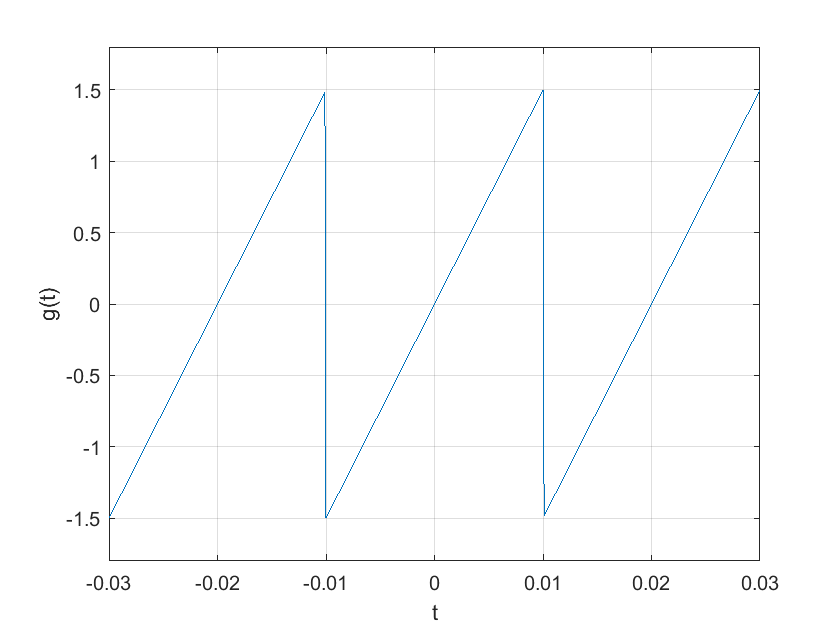

In [1]:
clear
close all
clc

t=[-0.03:0.0001:0.03];
g=(150*(t+0.02)).*((t>=-0.03)&(t<-0.01))+(150*t).*((t>-0.01)&(t<=0.01))+...
   +(150*(t-0.02)).*((t>0.01)&(t<=0.03));

plot(t,g);
xlabel("t");
ylabel("g(t)")
axis([-0.03 0.03 -1.8 1.8]) %La istrucción axis ajusta los ejes de la gráfica
grid;

La transformada de Fourier de la señal diente de sierra muestra su contenido en frecuencia. Como se trató en la sección aterior, en donde se calcularon los coeficientes de la serie de fourier, la señal tipo diente de sierra tiene componentes frecuenciales en múltiplos de la frecuencia original, en este caso particular, múltiplos de la frecuencia fundamental $\omega_0=100\pi$. El algoritmo de la transformada de Fourier de la señal diente se ejemplifica a continuación:

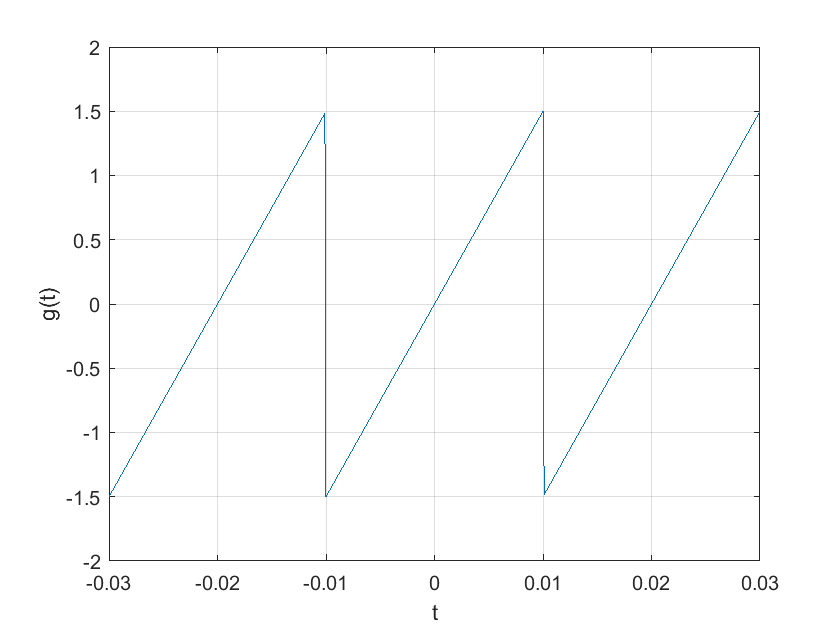

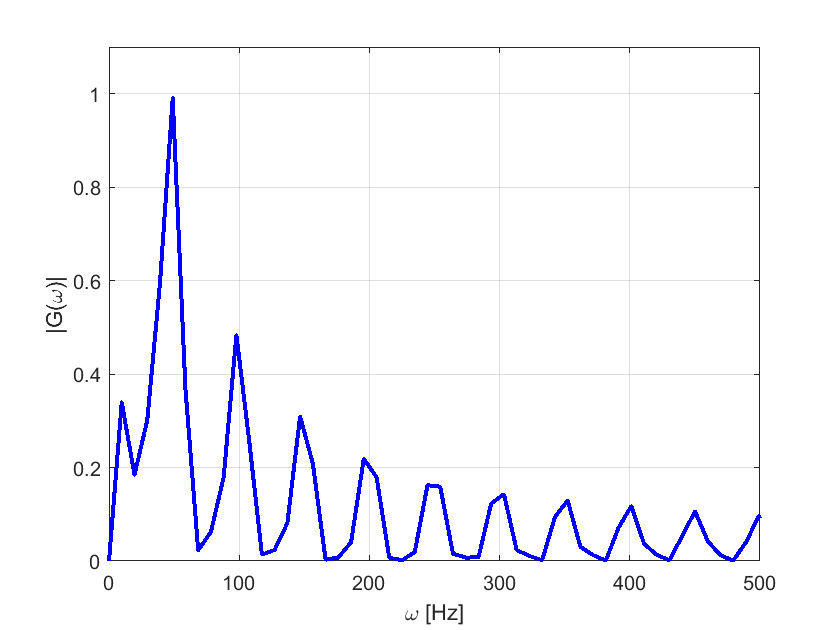

In [2]:
clear
close all
clc

freq_muestreo=10000;
t=[-0.03:1/freq_muestreo:0.03];

g=(150*(t+0.02)).*((t>=-0.03)&(t<-0.01))+(150*t).*((t>-0.01)&(t<=0.01))+...
   +(150*(t-0.02)).*((t>0.01)&(t<=0.03));

figure
plot(t,g);
xlabel("t");
ylabel("g(t)")
axis([-0.03 0.03 -2 2]) %La istrucción axis ajusta los ejes de la gráfica
grid;


n=(size(t));% número total de muestras a utilizar
NFFT = 2^nextpow2(max(n));% resolución óptima para el cálculo de la FFT
f = (freq_muestreo/2).*linspace(0,1,NFFT/2);

Y= fft((g-mean(g)),NFFT)/(max(n)/2);%Calculo de la FFT, Y es el nombre del vector de salida
r=Y(1:NFFT/2);%sólo se toma la parte de las frecuencias positivas es decir, la mitad del espectro
 
figure
plot(f,abs(r),'-b','LineWidth',2) % se grafica la magnitud contra la frecuencia.
grid
xlabel("\omega [Hz]")
ylabel("|G(\omega)|")
axis([0 500, 0 1.1]) 

## Ejemplo 2, pulso cuadrado. 

Cosidere una función tipo pulso cuadrado, definida por la ecuación:

```{math}
:label: func_pulso2
\begin{equation}
         g(t)= \left\{ \begin{array}{lcc} 5 & si & -0.5 \leq t \leq 0.5 \\ \\ 0 & si & 0.5 \leq t \leq 1.5  \end{array} \right.
		 \end{equation}
```
El algoritmo de la FFT aplicado a la señal pulso cuadrado 

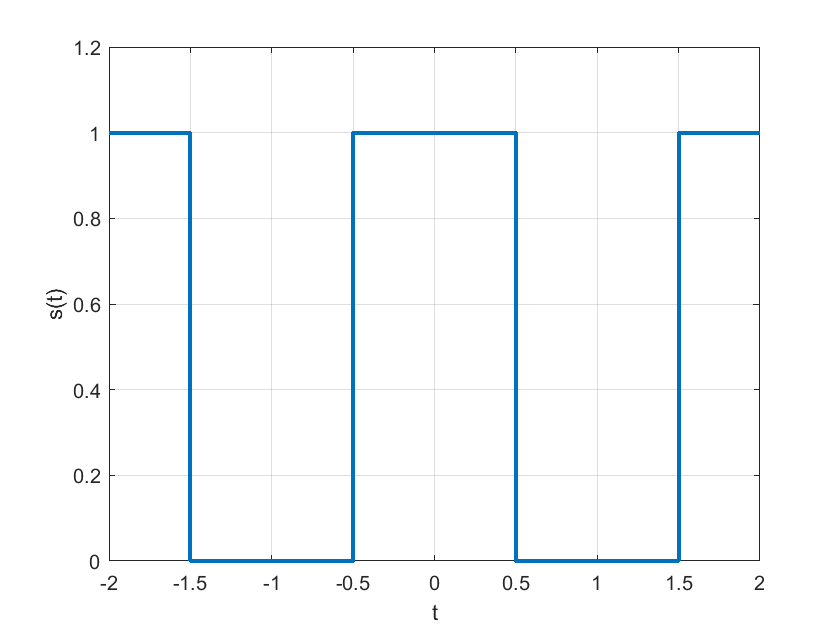

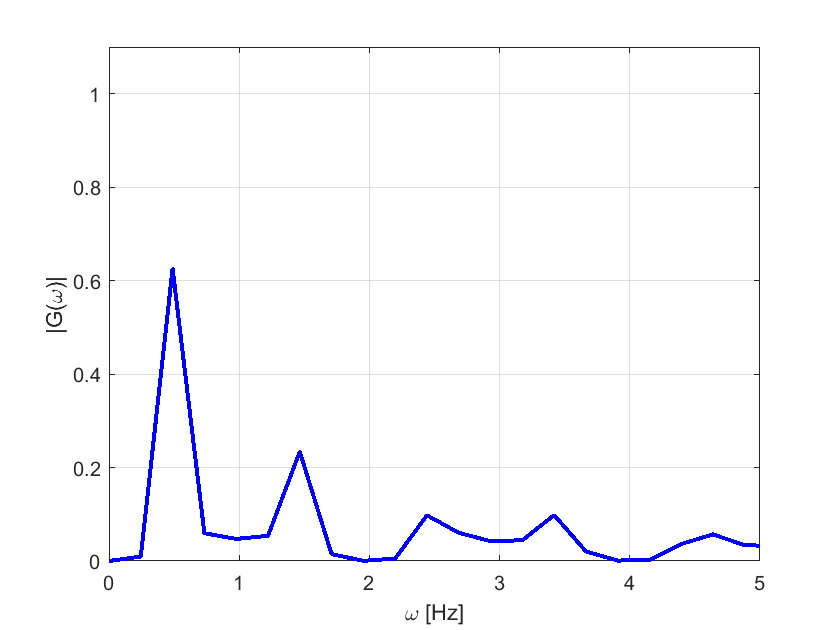

In [3]:
clear
close all
clc

freq_muestreo=2000;
t=[-2:1/freq_muestreo:2];

s=1*((t>=-2)&(t<=-1.5))+1*((t>-0.5)&(t<=0.5))+1*((t>1.5)&(t<=2));

figure
plot(t,s,"linewidth",2);
xlabel("t");
ylabel("s(t)")
axis([-2 2 0 1.2]) %La istrucción axis ajusta los ejes de la gráfica
grid;



n=(size(t));% número total de muestras a utilizar
NFFT = 2^nextpow2(max(n));% resolución óptima para el cálculo de la FFT
f = (freq_muestreo/2).*linspace(0,1,NFFT/2);

Y= fft((s-mean(s)),NFFT)/(max(n)/2);%Calculo de la FFT, Y es el nombre del vector de salida
r=Y(1:NFFT/2);%sólo se toma la parte de las frecuencias positivas es decir, la mitad del espectro
 
figure
plot(f,abs(r),'-b','LineWidth',2) % se grafica la magnitud contra la frecuencia.
grid
xlabel("\omega [Hz]")
ylabel("|G(\omega)|")
axis([0 5, 0 1.1]) 

En estos ejemplos se puede observar como las componentes frecuenciales son múltiplos de la frecuencia fundamental $\omega_0=1/T$, con $T$ el periodo de la función. Para una señal en general se aplica el algoritmo de la FFT para encontrar su contenido frecuencial o armónico.

## Ejemplo 3, señal con tres componentes frecuenciales y ruido blanco aleatorio.

Considérese ahora el caso de una señal definida por la expresión:

$$
x(t)=3.5cos(2\pi 350 t)+2.4sen(2\pi 500 t)+1.5cos(2\pi 1000 t)+\gamma(t)
$$

donde $\gamma(t)$ es ruido blanco aleatorio de amplitud $0.5$. Las siguientes líneas de código de MATLAB permiten el análisis de la señal $x(t)$ en términos de su contenido frecuencial.


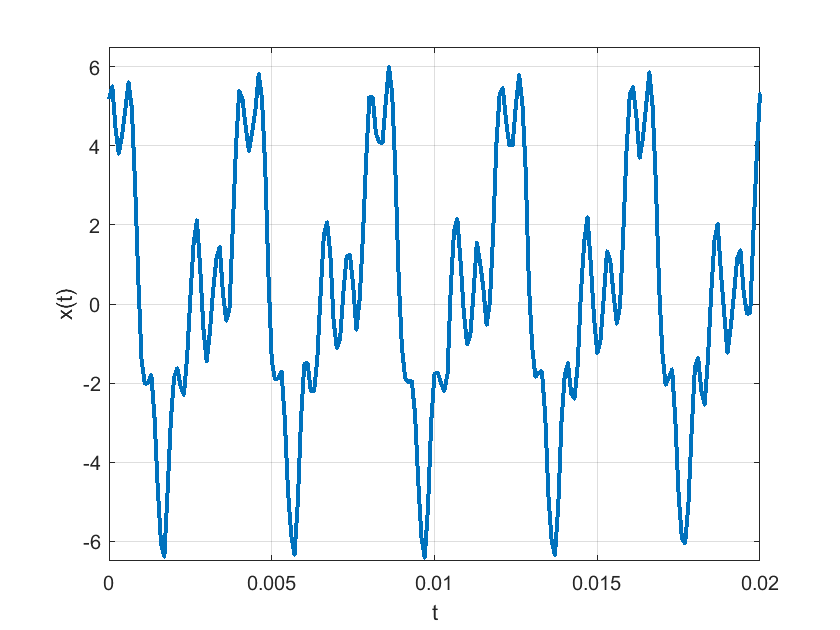

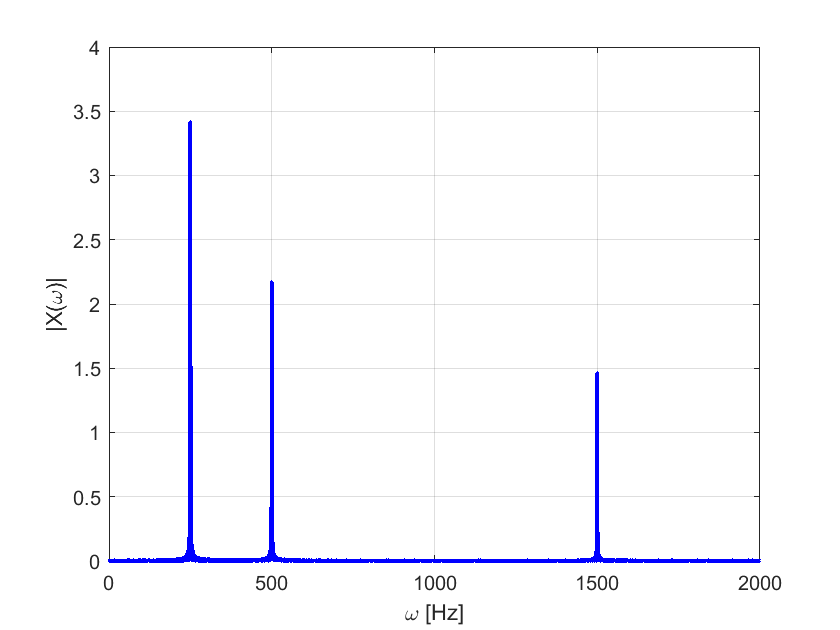

In [4]:
clear
close all
clc

freq_muestreo=10000;
t=[0:1/freq_muestreo:2];

x=3.5*cos(2*pi*250*t)+2.4*sin(2*pi*500*t)+1.5*cos(2*pi*1500*t)+0.5*rand(size(t));

figure
plot(t,x,"linewidth",2);
xlabel("t");
ylabel("x(t)")
axis([0 0.02 -6.5 6.5]) %La istrucción axis ajusta los ejes de la gráfica
grid;

n=(size(t));% número total de muestras a utilizar
NFFT = 2^nextpow2(max(n));% resolución óptima para el cálculo de la FFT
f = (freq_muestreo/2).*linspace(0,1,NFFT/2);

Y= fft((x-mean(x)),NFFT)/(max(n)/2);%Calculo de la FFT, Y es el nombre del vector de salida
r=Y(1:NFFT/2);%sólo se toma la parte de las frecuencias positivas es decir, la mitad del espectro
 
figure
plot(f,abs(r),'-b','LineWidth',2) % se grafica la magnitud contra la frecuencia.
grid
xlabel("\omega [Hz]")
ylabel("|X(\omega)|")
axis([0 2000, 0 4]) 

El algoritmo de la transformada rápida de Fourier permite distinguir con mucha claridad los componentes frecuenciales de la señal $x(t)$. En la gráfica se observan los picos en los valores de frecuencia de 250, 500 y 1500 Hz, a pesar de la presencia de ruido blanco aleatorio.

## Aplicación a un sistema dinámico

La respuesta en frecuencia de un circuito RLC serie ha sido plenamente analizada en secciones anteriores, en esta sección se usará para ejemplificar el uso de la FFT para la determinación de la respuesta en frecuencia de forma numérica de los sistemas dinámicos a partir de mediciones de su salida. En las siguietes líneas se calcula la respuesta del circuito RLC.



G =
 
        9.904e04
  ---------------------
  s^2 + 106 s + 6.02e04
 
Continuous-time transfer function.


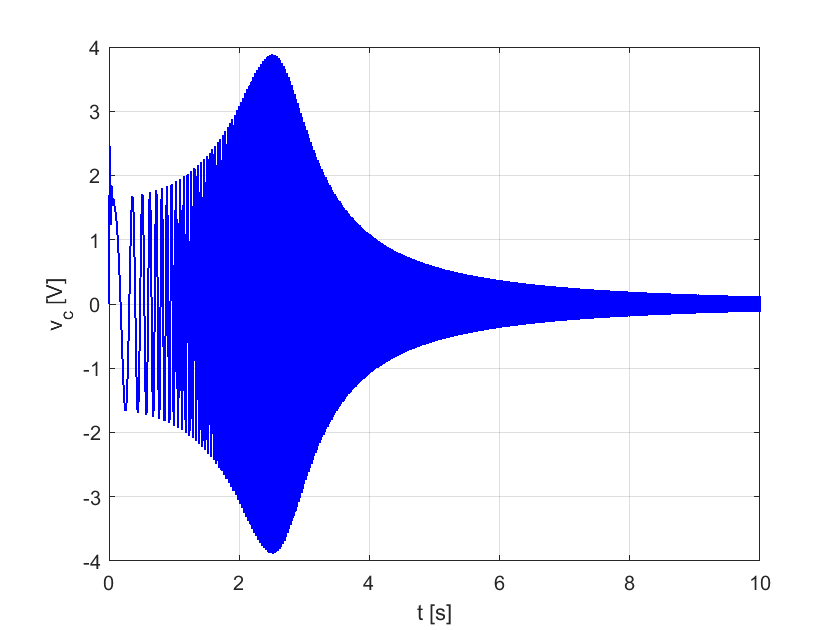

In [5]:
clear
close all
clc

n_muestras=2^12;
freq_muestreo=5000;

%-------------------------------------------------------------------
%      Parámetros del sistema
%-------------------------------------------------------------------
R=1600;
C=1.1*(10^(-6));
L=15.1;



num=[1.645/(L*C)];
den=[1 R/L 1/(L*C)];


G=tf(num,den)

t=[0:1/freq_muestreo:10];

vi=chirp(t,0.1,max(t),150);
[y,to]=lsim(G,vi,t);
%[y,to]=step(G,t);

plot(to,y,'-b','LineWidth',1)
grid
axis([0 1*max(t),-4 4]) 

xlabel('t [s]')
ylabel('v_c [V]')




Se aplica el algoritmo de la FFT para encontrar el contenido frecuencial de la señal, y por lo tanto, un bosquejo de la respuesta en frecuencia del circuito RLC.

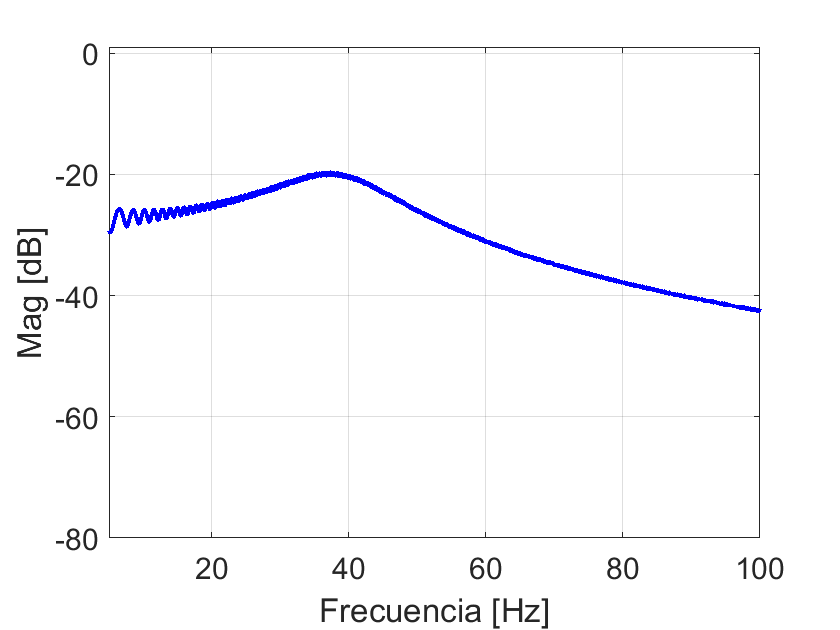

In [6]:
n=(size(t));% número total de muestras a utilizar
NFFT = 2^nextpow2(max(n));% resolución óptima para el cálculo de la FFT
f = (freq_muestreo/2).*linspace(0,1,NFFT/2);

Y= fft((y-mean(y)),NFFT)/(max(n)/2);%Calculo de la FFT, x es el nombre del vector de salida
r=Y(1:NFFT/2);%solo se toma la parte de las frecuencias positivas es decir, la mitad del espectro
 
figure
plot(f,20*log10(abs(r)),'-b','LineWidth',2) % se grafica la magnitud contra la frecuencia.

hold on
axis([5 100,-80 1]) 
grid
 
xlabel('Frecuencia [Hz]')
ylabel('Mag [dB]')
set(gca,'FontSize',15)

Finalmente, este resultado se compara con el diagrama de bode del sistema, por medio de las siguientes instrucciones:

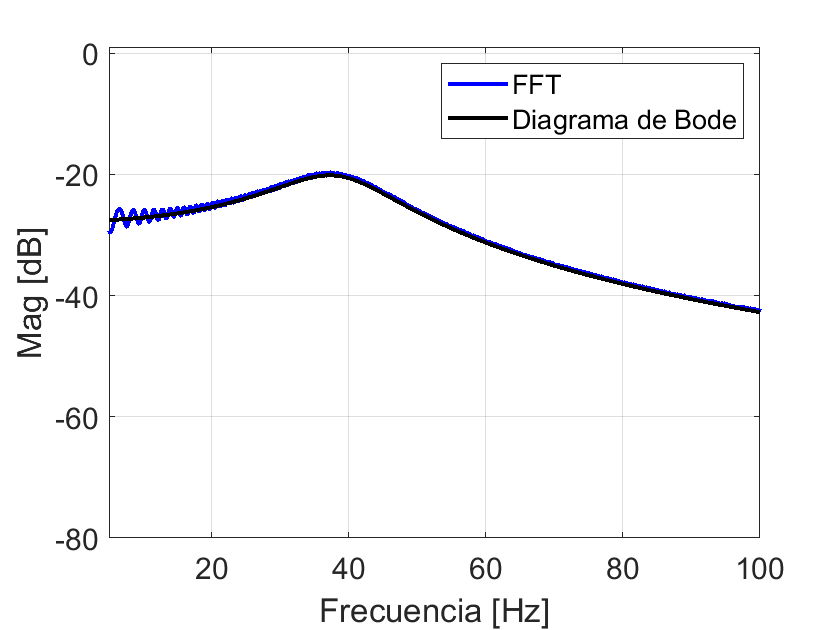

In [7]:
[mag,ph,w]=bode(G,f*2*pi);
dB=[];

for i=1:1:max(size(mag))
    dB(i)=20*log10(mag(1,1,i))-32;
end  

plot(f,dB,'-k','LineWidth',2)
legend('FFT','Diagrama de Bode')

Como puede observarse, el algoritmo de la FFT es perfectamente compatible con el diagrama de Bode que permite la determinación de la respuesta en frecuencia de los sistemas, por lo tanto, un barrido frecuencial experimental, se utiliza para recolectar la información de la respuesta dinámica del sistema, se procesa la señal resultante mediante el algoritmo de la FFT y se obiente la respuesta en frecuencia experimental del sistema.